## Week3_day2_lesson: Flooding in Boulder CO

### Time Series

## Timestamps 

`pandas` represents an instant in time using the `pandas.Timestamp` class:

In [3]:
import pandas as pd

# Create a timestamp 
pd.Timestamp(year = 2025, 
            month = 10,
            day = 16,
            hour = 9,
            minute = 56,
            second = 40)

Timestamp('2025-10-16 09:56:40')

In [6]:
pd.Series([pd.Timestamp(2020,10,16),
          pd.Timestamp(2020,10,17),
          pd.Timestamp(2020,10,18)])

0   2020-10-16
1   2020-10-17
2   2020-10-18
dtype: datetime64[ns]

## Data exploration

In [8]:
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'

precip=pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

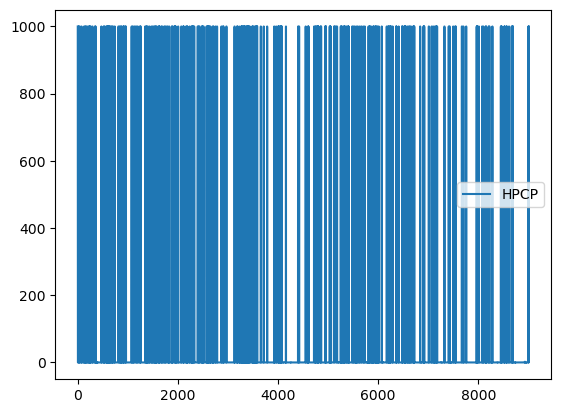

In [10]:
precip.plot()

## Reading in missing data values

Metadata indicates missing values are 999.99.
Can directly read in this value as na



In [12]:
# Read in csv indicating na values based on metadata
precip = pd.read_csv(URL, na_values = [999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

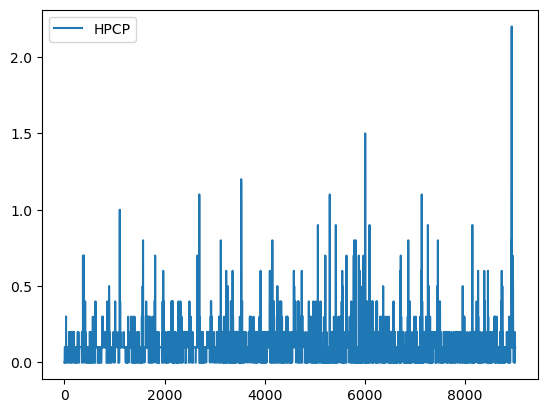

In [14]:
precip.plot()

## Convert stings into dates

In [18]:
# Check whether date column is a datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

It isnt, so we need to make it a datetime

In [20]:
precip['DATE'] = pd.to_datetime(precip['DATE'])

# Check if data type is updated

precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<Axes: xlabel='DATE'>

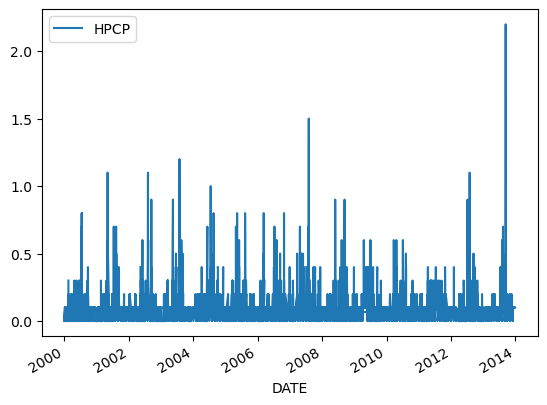

In [23]:
precip.plot(x = 'DATE',  y= 'HPCP')


Set date as index

In [25]:
precip = precip.set_index('DATE')

precip.head()

KeyError: "None of ['DATE'] are in the columns"

<Axes: xlabel='DATE'>

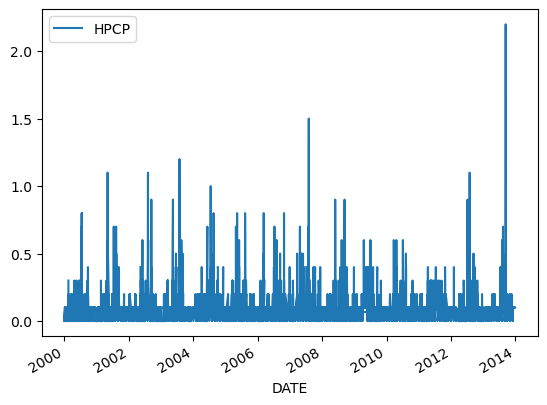

In [27]:
precip.plot()

## Read in csv with a lot of wrangling

In [29]:
precip = pd.read_csv(URL,
                     na_values = [999.99],
                    index_col = ['DATE'],
                    parse_dates = ['DATE'])

## Subsetting by date 
We can use `.loc[year-month]` to select data from a specific year and month 

In [31]:
# Select precipitation from september 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [33]:
# Select the year 2013
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

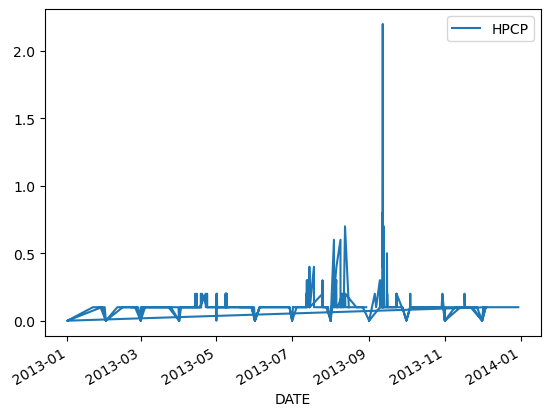

In [34]:
# Plot that 
precip.loc['2013'].plot()

## Resample dataset 

Resampling a time series means converting time series from one frequency to another. For example, monthly to yearly (downsampling) or weekly to daily (upsampling).

We can resample with the `resample()` method. The simple use is to call 

```
df.resample(new_frequency).aggregator_function()
```

where:

- `new_frequency`: is a string representing the new frequency to resample the data
    - `'D'` = day
    - `'W'` = week
    - `'Y'` = Year
    - `'M'` = month
- `Aggregator_function` is the function we use to aggregate to new frequency
    - `min()`
    - `max()`
    - `sum()`
    - `average()`

In [37]:
# Resample 2013 hourly data to daily frequency 
daily_preci_2013 = precip.loc['2013'].resample('D').sum() # Here we use sum

In [38]:
daily_preci_2013.dtypes

STATION              object
STATION_NAME         object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

<Axes: title={'center': 'Precipitation in Boulder, CO in 2013'}, ylabel='daily precipitation (in)'>

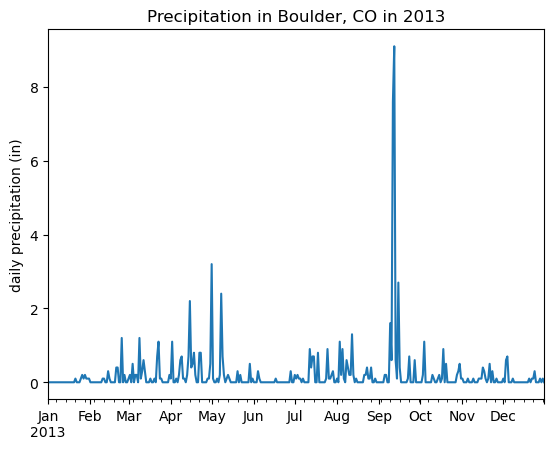

In [40]:
daily_preci_2013.plot(ylabel = 'daily precipitation (in)',
                     xlabel = '',
                     title = 'Precipitation in Boulder, CO in 2013',
                     legend = False)